#

In [1]:
!which python

/Users/karthikmaddukuri/anaconda3/envs/iris/bin/python


In [2]:
%load_ext autoreload
%autoreload 2

In [71]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import os
from sklearn import datasets
from sklearn.model_selection import train_test_split
import seaborn as sns
%matplotlib inline

In [5]:
sns.set()

# Load Data

In [7]:
data = datasets.load_iris()

In [10]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [22]:
print(data['data'][:5], end='\n\n')
print(data['feature_names'])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


 _The goal is to predict the species of the flower or classify the species into setosa, versicolor, or virginica using the 4 attributes._
 
**This is a  Multiclass classification problem**

## Load data into a DataFrame

In [24]:
df = pd.DataFrame(data['data'], columns=data['feature_names'])

In [25]:
df['target'] = data['target']

In [26]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Exploratory Data Analysis

In [29]:
df.shape

(150, 5)

In [28]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


#### Plotting the distribution of features

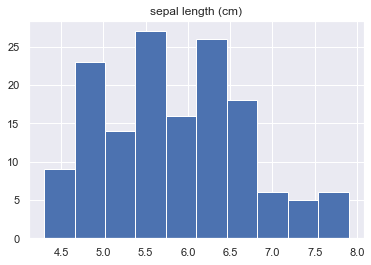

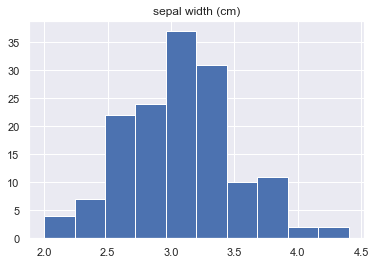

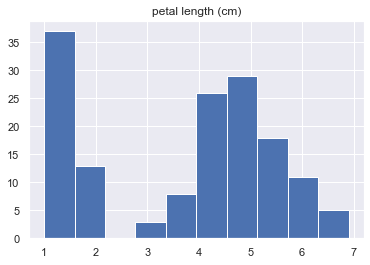

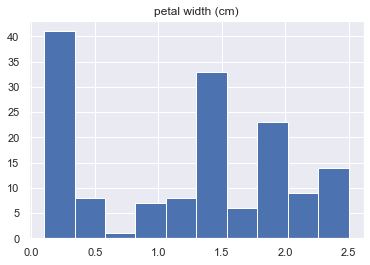

In [49]:
columns = df.columns[:4]
for col in columns:
    df[col].hist(bins=10)
    plt.title(col)
    plt.show()

#### Plotting a Univariate Relational Plot between the features and the target

In [61]:
df['target_name'] = df['target'].map({0: 'setosa', 1: 'versicolor', 2: "virginica"})
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


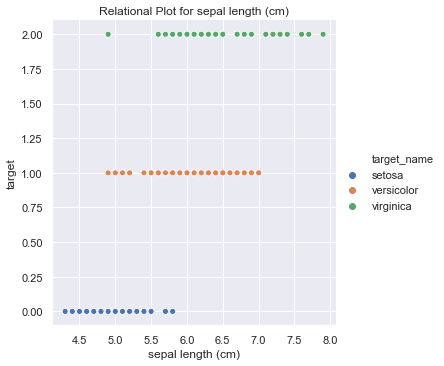

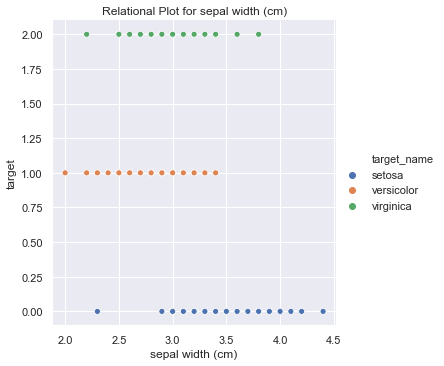

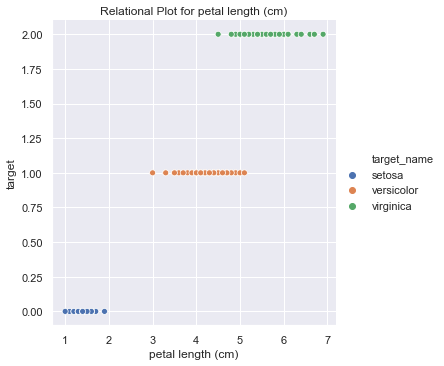

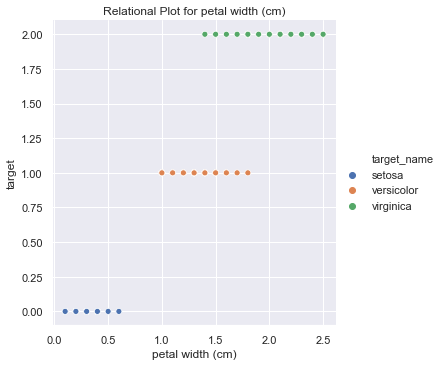

In [67]:
col_attr = df.columns[:4]
for col in col_attr:
    sns.relplot(x=f'{col}', y='target', hue='target_name', data=df)
    plt.title(f'Relational Plot for {col}', y=2)
    plt.show()

#### Pairplots

/Users/karthikmaddukuri/anaconda3/envs/iris/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/karthikmaddukuri/anaconda3/envs/iris/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/karthikmaddukuri/anaconda3/envs/iris/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


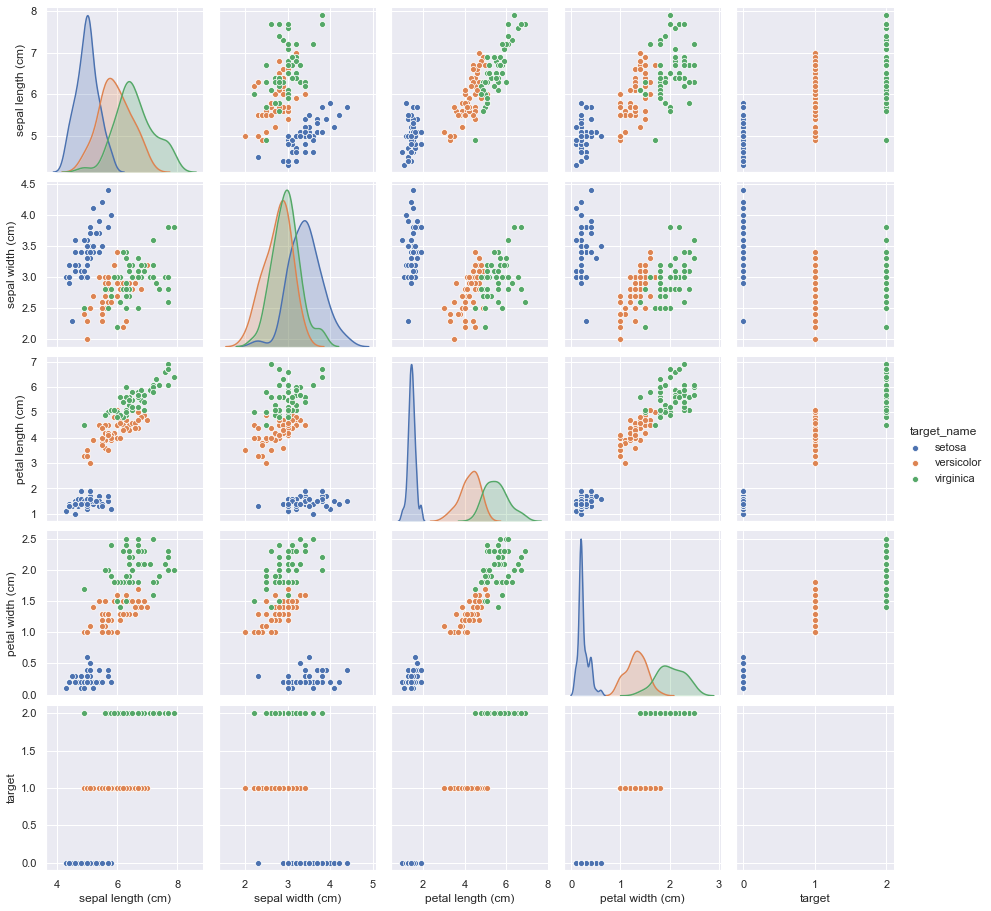

In [70]:
_ = sns.pairplot(df, hue='target_name')

In the _petal width v/s petal length_ plot and _target v/s petal length_ plot, _setosa_ has its own cluster. It is evident from the above plots that **_setosa_** is easily differentiable.

### Splitting the data inot Training and Testing

In [73]:
df_train, df_test = train_test_split(df, test_size=0.25, random_state=0)

In [76]:
print(f'Training Data size is {df_train.shape}', end='\n\n')
print(f'Testing Data size is {df_test.shape}')

Training Data size is (112, 6)

Testing Data size is (38, 6)


In [77]:
df_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
61,5.9,3.0,4.2,1.5,1,versicolor
92,5.8,2.6,4.0,1.2,1,versicolor
112,6.8,3.0,5.5,2.1,2,virginica
2,4.7,3.2,1.3,0.2,0,setosa
141,6.9,3.1,5.1,2.3,2,virginica


### Prep Data for Modeling (using Numpy arrays)

In [ ]:
X_train = df_train.drop(columns=['target', 'target_name']).values
y_train